# (1)Import Library

In [ ]:
# most import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.impute import SimpleImputer # missing data
from sklearn.compose import ColumnTransformer # Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures

# Train Test split
from sklearn.model_selection import train_test_split

# ML model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


#(2)Import Datasate

In [ ]:
ds = pd.read_csv("/content/housing.csv")

In [ ]:
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
x = ds.drop(columns=["median_house_value"],axis=1)
y = ds["median_house_value"]

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


#(3) preprocessing

## (1) using some Function in pandas to understand data
## (2) missing Data
## (3) visualization for EDA
## (4) Encoding
## (5) Feature Scaling


In [ ]:
# (1) using some Function in pandas
ds.head(10).style.background_gradient(cmap="Greens")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY
5,-122.250000,37.850000,52.000000,919.000000,213.000000,413.000000,193.000000,4.036800,269700.000000,NEAR BAY
6,-122.250000,37.840000,52.000000,2535.000000,489.000000,1094.000000,514.000000,3.659100,299200.000000,NEAR BAY
7,-122.250000,37.840000,52.000000,3104.000000,687.000000,1157.000000,647.000000,3.120000,241400.000000,NEAR BAY
8,-122.260000,37.840000,42.000000,2555.000000,665.000000,1206.000000,595.000000,2.080400,226700.000000,NEAR BAY
9,-122.250000,37.840000,52.000000,3549.000000,707.000000,1551.000000,714.000000,3.691200,261100.000000,NEAR BAY


In [ ]:
ds.tail(10).style.background_gradient(cmap="Reds")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.320000,39.290000,11.000000,2640.000000,505.000000,1257.000000,445.000000,3.567300,112000.000000,INLAND
20631,-121.400000,39.330000,15.000000,2655.000000,493.000000,1200.000000,432.000000,3.517900,107200.000000,INLAND
20632,-121.450000,39.260000,15.000000,2319.000000,416.000000,1047.000000,385.000000,3.125000,115600.000000,INLAND
20633,-121.530000,39.190000,27.000000,2080.000000,412.000000,1082.000000,382.000000,2.549500,98300.000000,INLAND
20634,-121.560000,39.270000,28.000000,2332.000000,395.000000,1041.000000,344.000000,3.712500,116800.000000,INLAND
20635,-121.090000,39.480000,25.000000,1665.000000,374.000000,845.000000,330.000000,1.560300,78100.000000,INLAND
20636,-121.210000,39.490000,18.000000,697.000000,150.000000,356.000000,114.000000,2.556800,77100.000000,INLAND
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.000000,433.000000,1.700000,92300.000000,INLAND
20638,-121.320000,39.430000,18.000000,1860.000000,409.000000,741.000000,349.000000,1.867200,84700.000000,INLAND
20639,-121.240000,39.370000,16.000000,2785.000000,616.000000,1387.000000,530.000000,2.388600,89400.000000,INLAND


In [ ]:
ds.sample(10).style.background_gradient(cmap="Blues")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13393,-117.590000,34.030000,16.000000,3443.000000,562.000000,2130.000000,564.000000,5.076900,161400.000000,INLAND
598,-122.060000,37.700000,37.000000,1893.000000,310.000000,821.000000,315.000000,4.600500,231600.000000,NEAR BAY
16208,-121.300000,37.940000,40.000000,452.000000,109.000000,412.000000,97.000000,1.341700,60800.000000,INLAND
16842,-122.450000,37.630000,28.000000,4946.000000,848.000000,2683.000000,824.000000,5.748000,302100.000000,NEAR OCEAN
16961,-122.290000,37.530000,41.000000,839.000000,190.000000,419.000000,215.000000,5.012000,368200.000000,NEAR OCEAN
11412,-117.950000,33.690000,24.000000,4269.000000,618.000000,1954.000000,597.000000,6.926100,284600.000000,<1H OCEAN
2228,-119.770000,36.850000,8.000000,1519.000000,234.000000,711.000000,248.000000,5.989700,123600.000000,INLAND
8885,-118.500000,34.030000,44.000000,2146.000000,394.000000,851.000000,355.000000,6.480000,500001.000000,<1H OCEAN
1434,-122.030000,37.980000,44.000000,1254.000000,252.000000,498.000000,217.000000,3.453100,148900.000000,NEAR BAY
17347,-120.330000,34.870000,24.000000,2590.000000,404.000000,1093.000000,338.000000,3.937500,341200.000000,<1H OCEAN


In [ ]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
ds.describe(include = "object")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
ds.shape

(20640, 10)

In [ ]:

ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
ds.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [ ]:
ds.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [ ]:
ds["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
ds["ocean_proximity"].value_counts(normalize=True)

,proportion
ocean_proximity,
<1H OCEAN,0.442636
INLAND,0.317393
NEAR OCEAN,0.128779
NEAR BAY,0.110950
ISLAND,0.000242


In [ ]:
ds.nunique()

,0
longitude,844
latitude,862
housing_median_age,52
total_rooms,5926
total_bedrooms,1923
population,3888
households,1815
median_income,12928
median_house_value,3842
ocean_proximity,5


In [ ]:
ds.nunique().sum()

32085

In [ ]:
ds["ocean_proximity"].nunique()

5

In [ ]:
ds.drop_duplicates("ocean_proximity")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND


In [ ]:
ds.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:
ds.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
ds.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:
ds.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# (2)missing data
method1= ds.dropna() # implace default is false
method1
#ds= ds.dropna()  # 1 >> method
#ds.dropna(inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
method1.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
ds.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
method2 = ds.fillna(np.median) # 2 >> method
method2.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
ds.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
method3=ds.replace(np.nan,np.median) # 3 >> method # implace default false
method3.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
ds.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
from sklearn.impute import SimpleImputer # method(4)
imputer = SimpleImputer(strategy='median')
ds[["total_bedrooms"]] = imputer.fit_transform(ds[["total_bedrooms"]])
ds.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
ds["total_bedrooms"].median()

435.0

In [ ]:
h = ds[ds["total_bedrooms"]==ds["total_bedrooms"].median()]
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
477,-122.27,37.86,49.0,2052.0,435.0,924.0,414.0,2.5417,182700.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
h["ocean_proximity"].nunique()

4

In [ ]:
h["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,119
INLAND,65
NEAR OCEAN,36
NEAR BAY,24


In [ ]:
h.nunique()

,0
longitude,172
latitude,163
housing_median_age,48
total_rooms,242
total_bedrooms,1
population,229
households,204
median_income,239
median_house_value,229
ocean_proximity,4


In [ ]:
h.nunique().sum()

1531

In [ ]:
# (3) visualization for EDA
# 1- ocean proximity
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
ds['ocean_proximity'].nunique()

5

In [ ]:
ds['ocean_proximity'].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
m = ds['ocean_proximity'].value_counts()
m

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
m.index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

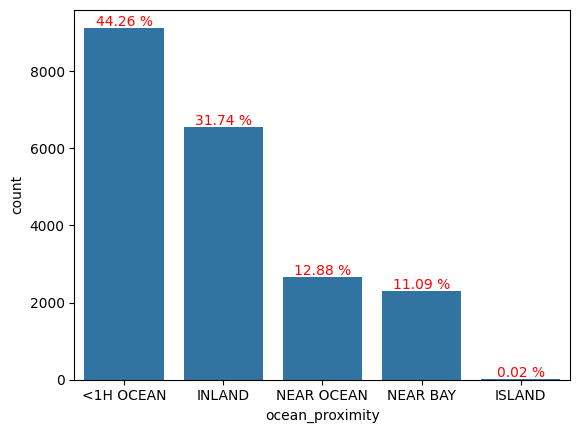

In [ ]:
sns.countplot(x=ds['ocean_proximity'],data=ds,order=m.index)
for i in range(len(m)):
  count = m.values[i]
  text = '{:0.2f} %'.format(count*100/len(ds))
  plt.text(x=i,y=count+50,s=text,ha="center",color="r")
plt.show()

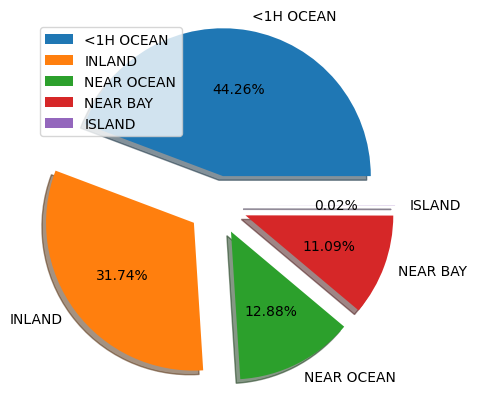

In [ ]:
plt.pie(x=m,labels=m.index,explode=[0.2,0.2,0.2,0.2,0.2],shadow=True,autopct='%0.2f%%')
plt.legend(loc='upper left')
plt.show()

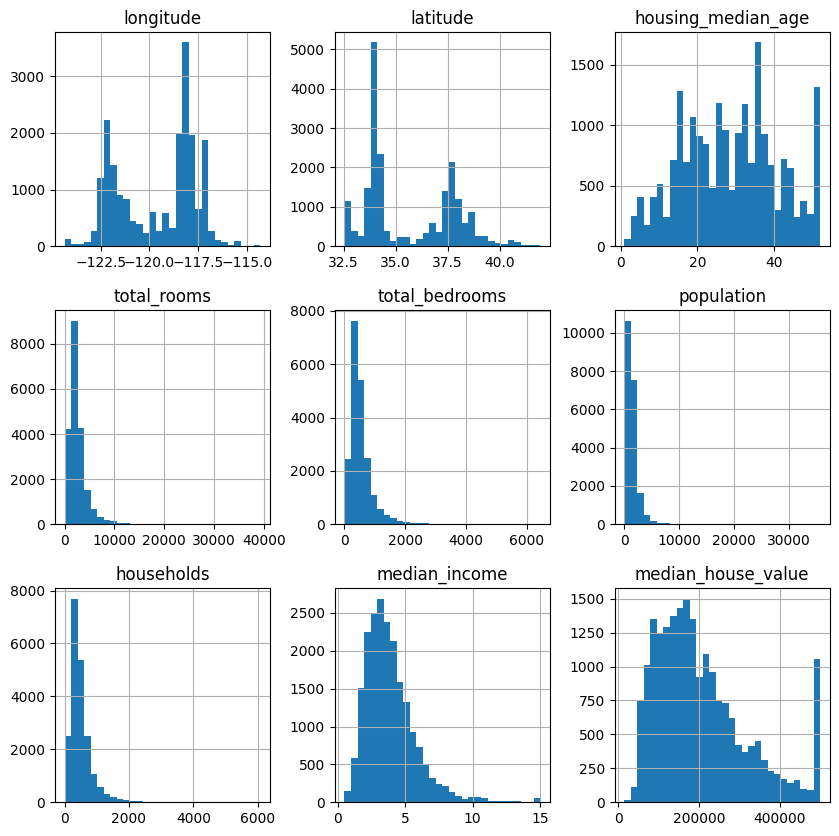

In [ ]:
ds.hist(bins=30,figsize=(10,10))
plt.show()

In [ ]:
#2- median_house_income
ds['median_house_value'].describe()

,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


In [ ]:
ds['median_house_value'].nunique()

3842

In [ ]:
house_value_bins = pd.cut( x= ds['median_house_value'],
                          bins=[0,100000,200000,300000,400000,500000,np.inf],
                          labels=["0-100k","100-200k","200-300k","300-400k","400-500k","500-600k"])

In [ ]:
house_value_bins.nunique()

6

In [ ]:
f = house_value_bins.value_counts()
f

,count
median_house_value,
100-200k,8273
200-300k,4873
0-100k,3658
300-400k,2092
500-600k,965
400-500k,779


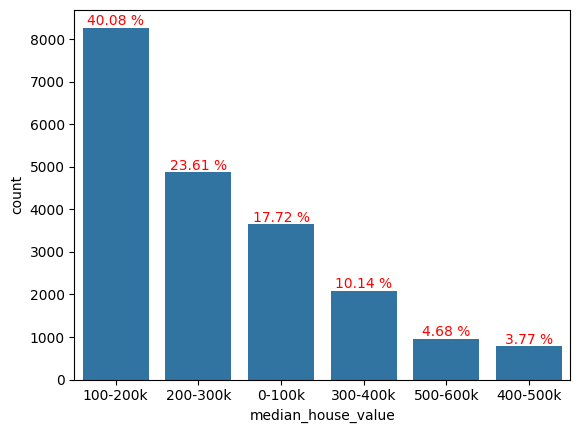

In [ ]:
sns.countplot(x=house_value_bins,order=f.index)
for i in range(len(f)):
  count = f.values[i]
  text = '{:0.2f} %'.format(count*100/len(ds))
  plt.text(x=i,y=count+50,s=text,ha="center",color="r")
plt.show()

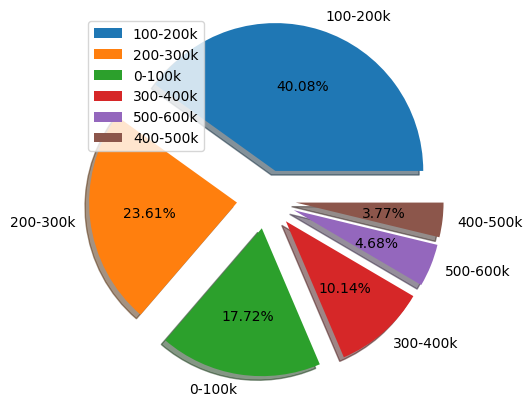

In [ ]:
plt.pie(x=f,labels=f.index,explode=[0.2,0.2,0.2,0.2,0.2,0.2],shadow=True,autopct='%0.2f%%')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 3- median_income
ds['median_income'].describe()

,median_income
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


In [ ]:
ds['median_income'].nunique()

12928

In [ ]:
income_bins = pd.cut(x=ds['median_income'],
                          bins=[0, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

In [ ]:
income_bins.nunique()

5

In [ ]:
n=income_bins.value_counts()
n

,count
median_income,
3-4.5,7236
1.5-3,6581
4.5-6,3639
6<,2362
0-1.5,822


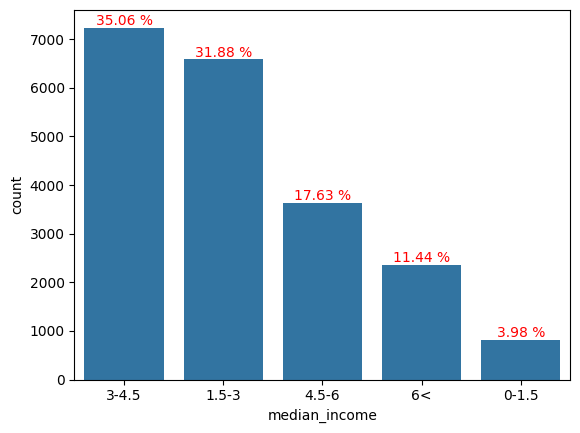

In [ ]:
sns.countplot(x=income_bins,order=n.index)
for i in range(len(n)):
  count = n.values[i]
  text = '{:0.2f} %'.format(count*100/len(ds))
  plt.text(x=i,y=count+50,s=text,ha="center",color="r")
plt.show()

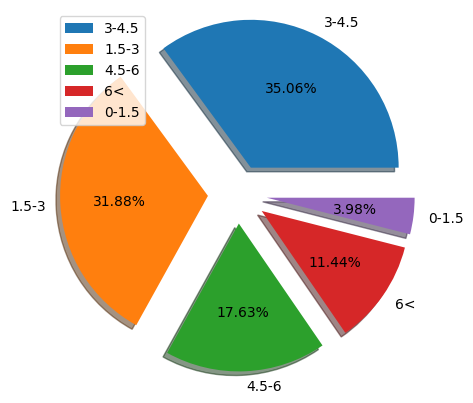

In [ ]:
plt.pie(x=n,labels=n.index,explode=[0.2,0.2,0.2,0.2,0.2],shadow=True,autopct='%0.2f%%')
plt.legend(loc='upper left')
plt.show()

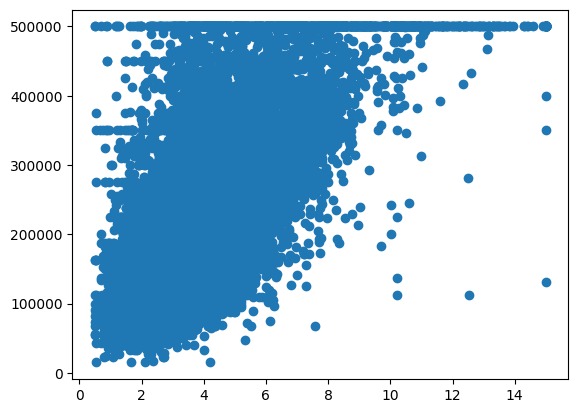

In [ ]:
# 4- scatter (1)-(2)-(3)
plt.scatter(x=ds["median_income"],y=ds["median_house_value"])
plt.show() # from this scatter there are very corrlation between median_house_income and median_income
#sns.relplot(x=ds["median_income"],y=ds["median_house_value"],data=ds)
#sns.relplot(x=ds["median_income"],y=ds["median_house_value"],data=ds,kind="scatter")
#sns.scatterplot(x=ds["median_income"],y=ds["median_house_value"],data=ds)

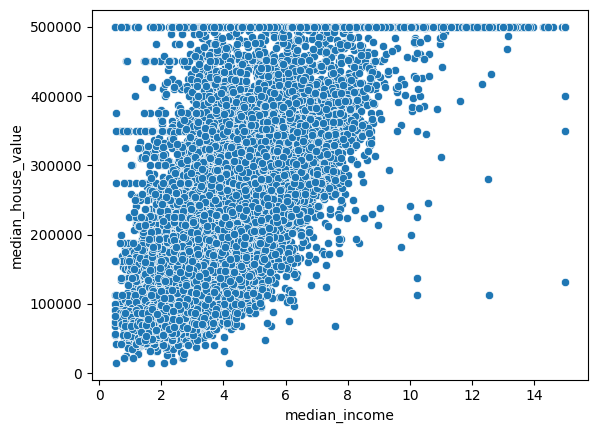

In [ ]:
sns.scatterplot(x=ds["median_income"],y=ds["median_house_value"],data=ds)
plt.show()

In [ ]:
ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

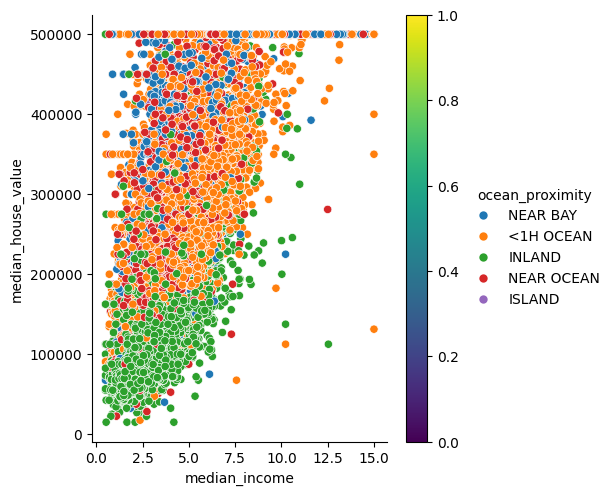

In [ ]:
#sc = sns.relplot(x= "median_income",y= "median_house_value",data=ds,kind="scatter",hue="ocean_proximity")
#plt.colorbar(sc.ax.get_children()[0])
#plt.show()
sc = sns.relplot(x= "median_income",y= "median_house_value",data=ds,hue="ocean_proximity")
plt.colorbar(sc.ax.get_children()[0])
plt.show()


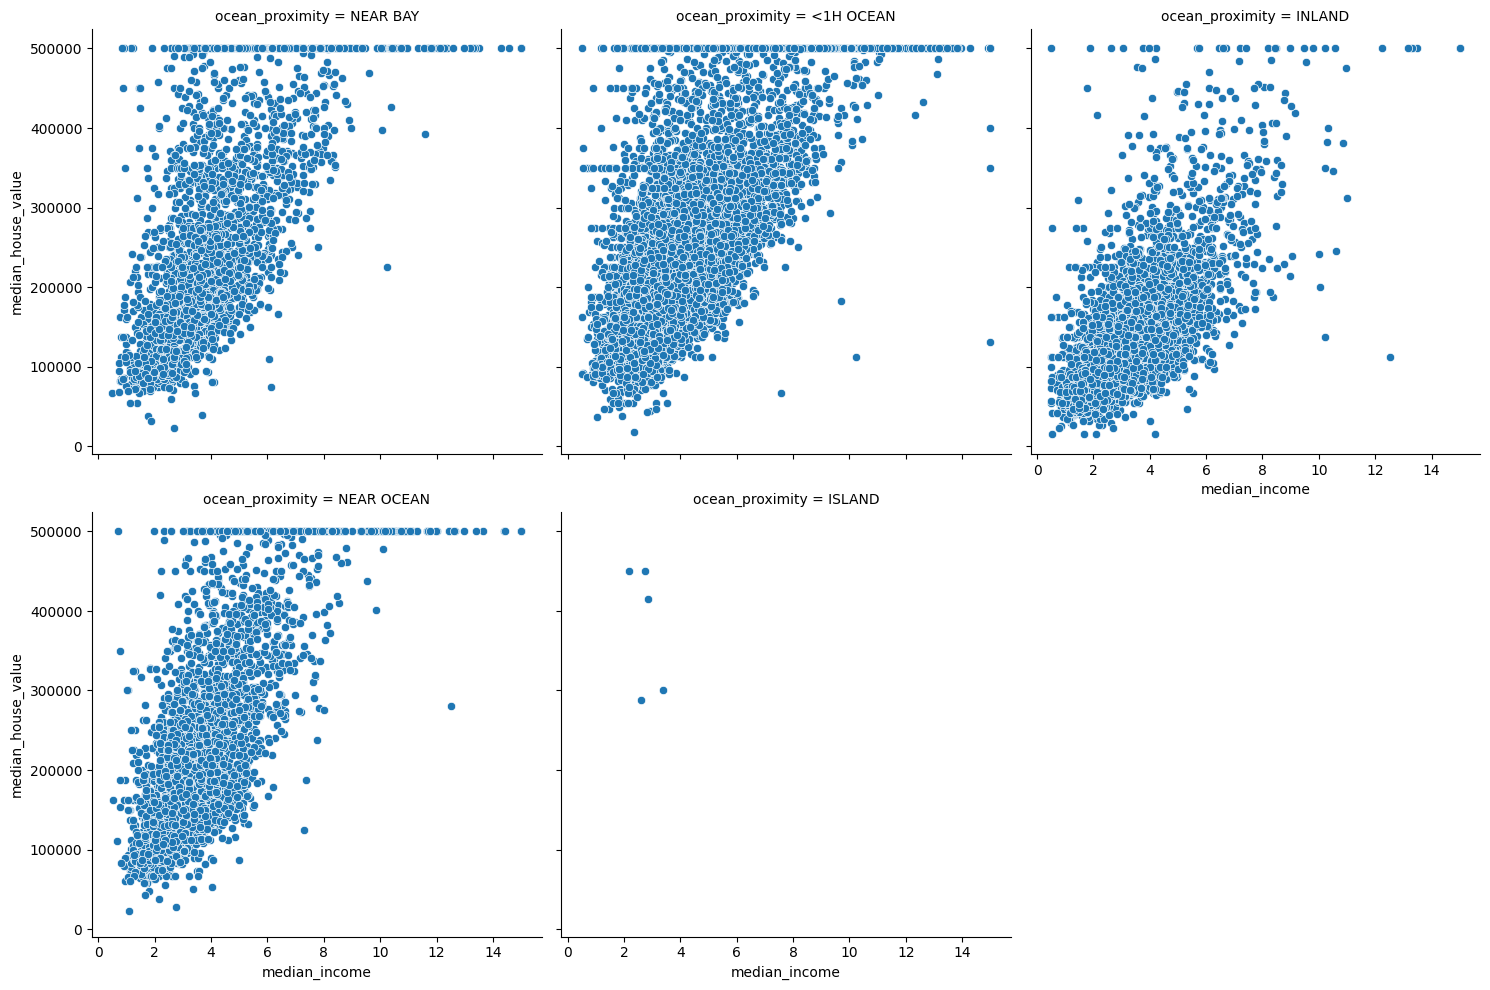

In [ ]:
#sns.relplot(x= "median_income",y= "median_house_value",data=ds,kind="scatter",col="ocean_proximity",col_wrap=3)
#plt.show()
sns.relplot(x= "median_income",y= "median_house_value",data=ds,col="ocean_proximity",col_wrap=3)
plt.show()
 # relplot default kind is scatter

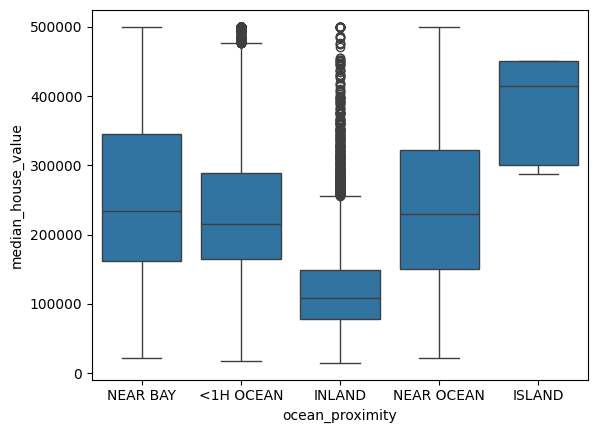

In [ ]:
sns.boxplot(x= "ocean_proximity",y="median_house_value",data=ds)
plt.show()

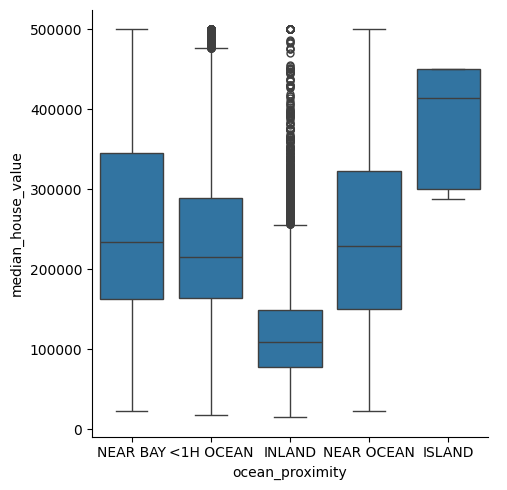

In [ ]:
sns.catplot(x= "ocean_proximity",y="median_house_value",data=ds,kind="box")
plt.show()

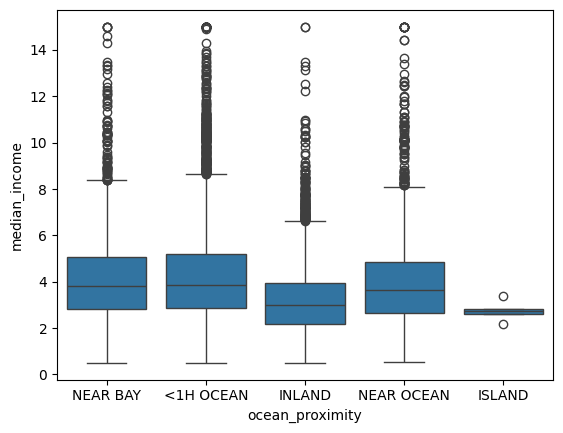

In [ ]:
sns.boxplot(x= "ocean_proximity",y="median_income",data=ds)
plt.show()

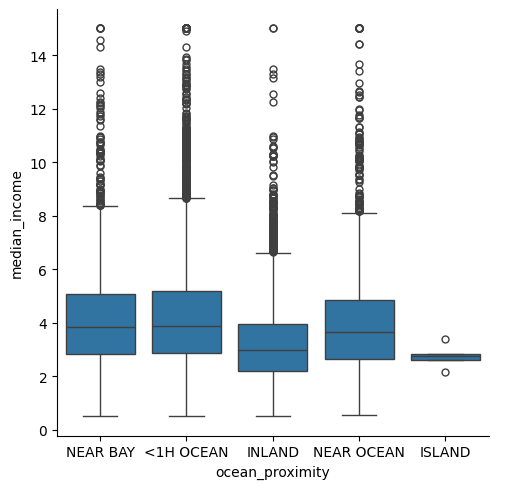

In [ ]:
sns.catplot(x= "ocean_proximity",y="median_income",data=ds,kind="box")
plt.show()

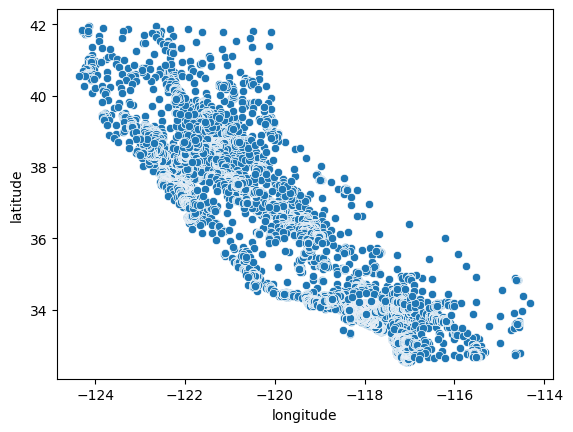

In [ ]:
# 5- longitude and latitude
sns.scatterplot(x=ds["longitude"],y=ds["latitude"],data=ds)
plt.show()
#plt.scatter(x=ds['longitude'],y=ds["latitude"])
#sns.relplot(x=ds["longitude"],y=ds["latitude"],data=ds,kind="scatter")
#sns.relplot(x=ds["longitude"],y=ds["latitude"],data=ds)

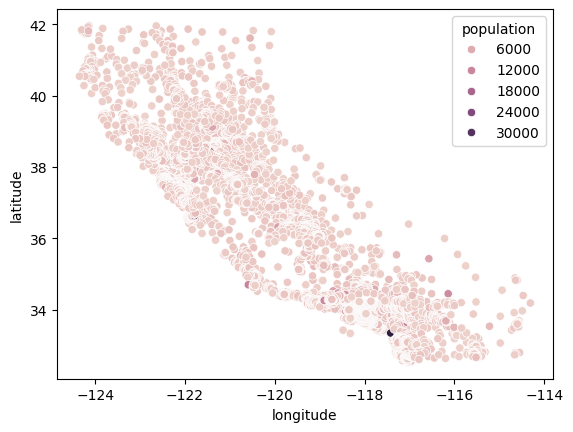

In [ ]:
sns.scatterplot(x=ds["longitude"],y=ds["latitude"],data=ds,hue=ds["population"])
#sns.relplot(x=ds["longitude"],y=ds["latitude"],hue=ds["population"],data=ds,kind="scatter")
#sns.relplot(x=ds["longitude"],y=ds["latitude"],hue=ds["population"],data=ds)
#plt.scatter(x=ds['longitude'],y=ds["latitude"],hue=ds["population"]) >> error
plt.show()

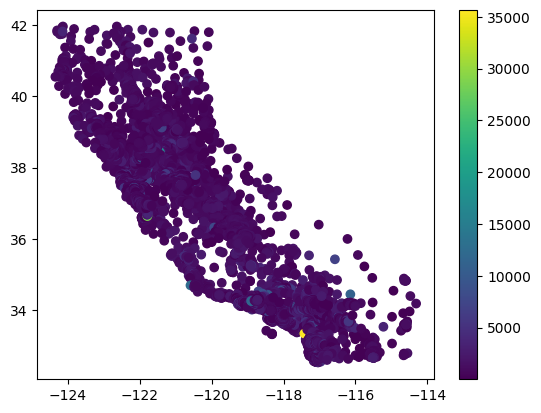

In [ ]:
sc = plt.scatter(x=ds['longitude'],y=ds["latitude"],c=ds["population"])
plt.colorbar(sc)
plt.show()

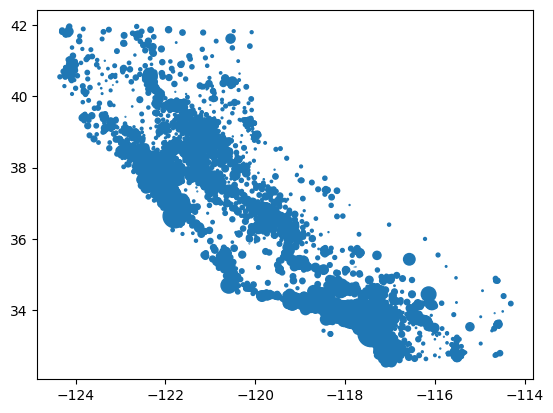

In [ ]:
sc = plt.scatter(x=ds['longitude'],y=ds["latitude"],s=ds["population"]/100)
plt.show()

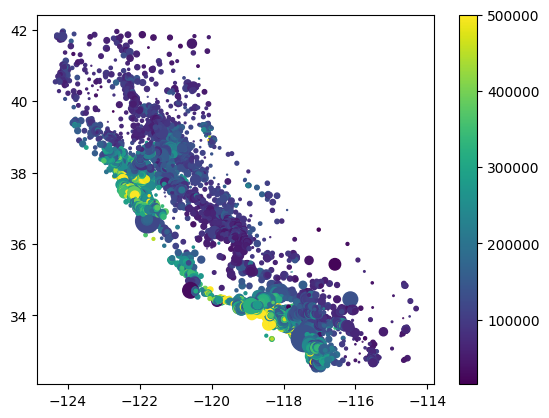

In [ ]:
sc = plt.scatter(x=ds['longitude'],y=ds["latitude"],s=ds["population"]/100 ,c=ds['median_house_value'])
plt.colorbar(sc)
plt.show()

In [ ]:
#6- ocean_proximity and population
ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

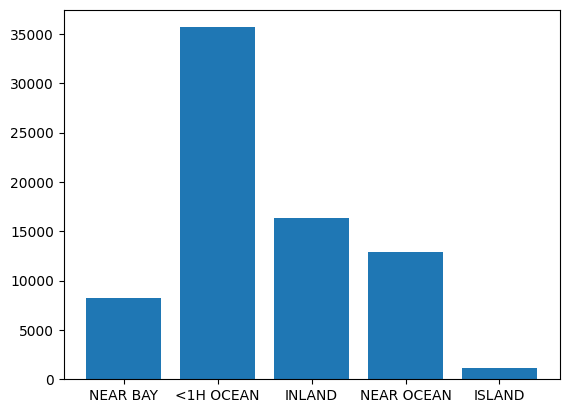

In [ ]:
plt.bar(x=ds["ocean_proximity"],height=ds["population"])
plt.show()

In [ ]:
# 7- corrlation
ds.corr(numeric_only=True).style.background_gradient(cmap="Greens")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [ ]:
ds.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
population,-0.024650
longitude,-0.045967
latitude,-0.144160


In [ ]:
'''households 	0.065843
total_bedrooms 	0.049457
population 	-0.024650
longitude 	-0.045967'''
# not good corrlation


'households \t0.065843\ntotal_bedrooms \t0.049457\npopulation \t-0.024650\nlongitude \t-0.045967'

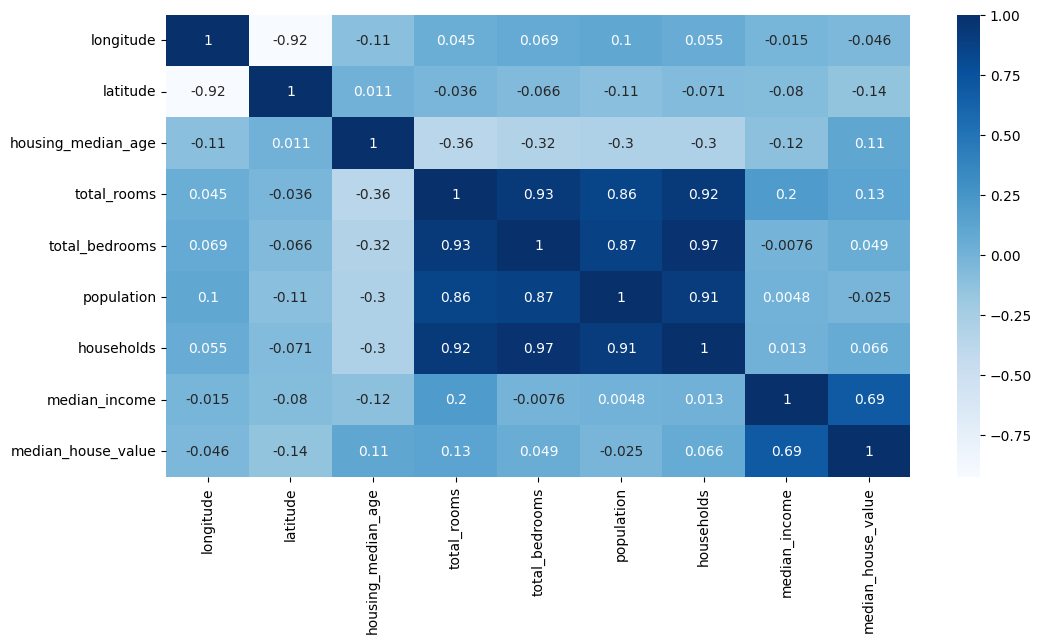

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.corr(numeric_only=True),annot=True,cmap="Blues")
plt.show()

In [ ]:
#(4) Encoding
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
x = ds.drop(columns=["median_house_value"],axis=1).values
y = ds["median_house_value"].values
x1 = ds.drop(columns=["median_house_value"],axis=1)
y1 = ds["median_house_value"]

In [ ]:
x1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y1

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
x1["ocean_proximity"] = le.fit_transform(x1["ocean_proximity"])
x1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [ ]:
x

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

In [ ]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encode", OneHotEncoder() ,[8])], remainder="passthrough")
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 0.0 ... 322.0 126.0 8.3252]
 [0.0 0.0 0.0 ... 2401.0 1138.0 8.3014]
 [0.0 0.0 0.0 ... 496.0 177.0 7.2574]
 ...
 [0.0 1.0 0.0 ... 1007.0 433.0 1.7]
 [0.0 1.0 0.0 ... 741.0 349.0 1.8672]
 [0.0 1.0 0.0 ... 1387.0 530.0 2.3886]]


In [ ]:
x.shape

(20640, 13)

In [ ]:
#(5)-feature scaling
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x1 = rs.fit_transform(x1)
y1 =rs.fit_transform(y1.values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x = rs.fit_transform(x)
y =rs.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
y =sc.fit_transform(y.reshape(-1,1))

In [ ]:
x1

array([[-0.98680739,  0.95767196,  0.63157895, ..., -0.87076923,
         2.1975824 ,  2.        ],
       [-0.98416887,  0.95238095, -0.42105263, ...,  2.24307692,
         2.18666422,  2.        ],
       [-0.98944591,  0.94973545,  1.21052632, ..., -0.71384615,
         1.70773218,  2.        ],
       ...,
       [-0.72031662,  1.36772487, -0.63157895, ...,  0.07384615,
        -0.84170929,  0.        ],
       [-0.74670185,  1.36772487, -0.57894737, ..., -0.18461538,
        -0.76500677,  0.        ],
       [-0.72559367,  1.35185185, -0.68421053, ...,  0.37230769,
        -0.525816  ,  0.        ]])

In [ ]:
y1

array([[ 1.88044789],
       [ 1.23204134],
       [ 1.18794143],
       ...,
       [-0.60223945],
       [-0.6546081 ],
       [-0.62222222]])

In [ ]:
c = pd.DataFrame(y)
c

,0
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900
...,...
20635,-1.115804
20636,-1.124470
20637,-0.992746
20638,-1.058608


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
# c =sc.fit_transform(c.reshape(-1,1)) # error to solve this error type c.values.reshape(-1,1)
y =sc.fit_transform(y.reshape(-1,1))

In [ ]:
x

array([[-0.89115574, -0.68188905, -0.01556621, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-0.89115574, -0.68188905, -0.01556621, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-0.89115574, -0.68188905, -0.01556621, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.89115574,  1.46651424, -0.01556621, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.89115574,  1.46651424, -0.01556621, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.89115574,  1.46651424, -0.01556621, ..., -0.03397701,
         0.07967221, -0.78012947]])

In [ ]:
y

array([[ 2.12963148],
       [ 1.31415614],
       [ 1.25869341],
       ...,
       [-0.99274649],
       [-1.05860847],
       [-1.01787803]])

In [ ]:
# we can use MinMaxScaler

# (4) Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=42)

In [ ]:
x_train

array([[-0.89115574, -0.68188905, -0.01556621, ...,  0.7722505 ,
         0.32292363, -0.32165429],
       [-0.89115574, -0.68188905, -0.01556621, ..., -0.09843989,
         0.67079931, -0.03061993],
       [-0.89115574, -0.68188905, -0.01556621, ..., -0.45077809,
        -0.42775547,  0.1503488 ],
       ...,
       [ 1.12213831, -0.68188905, -0.01556621, ...,  0.2918696 ,
         0.07182539, -0.49283239],
       [ 1.12213831, -0.68188905, -0.01556621, ...,  0.31041371,
         0.1555248 ,  0.97302487],
       [-0.89115574, -0.68188905, -0.01556621, ...,  1.05394445,
         1.94198411, -0.68174943]])

In [ ]:
x_test

array([[-0.89115574,  1.46651424, -0.01556621, ..., -0.02956174,
        -0.36759652, -1.15248922],
       [-0.89115574,  1.46651424, -0.01556621, ...,  0.12320645,
         0.22091497, -0.70501534],
       [-0.89115574, -0.68188905, -0.01556621, ..., -0.1019721 ,
         1.21222987, -0.20558796],
       ...,
       [ 1.12213831, -0.68188905, -0.01556621, ...,  0.14086751,
         0.17906526,  2.82092723],
       [-0.89115574,  1.46651424, -0.01556621, ..., -0.17526551,
        -0.06680176, -0.57147326],
       [ 1.12213831, -0.68188905, -0.01556621, ...,  0.21681008,
        -0.13480753, -0.16768875]])

In [ ]:
y_train

array([[-0.90001975],
       [ 1.51867493],
       [-0.29686264],
       ...,
       [ 0.13210686],
       [ 0.66420236],
       [ 1.02384345]])

In [ ]:
y_test

array([[-1.37925233],
       [-1.39571783],
       [ 2.54041094],
       ...,
       [ 2.54041094],
       [-1.16606749],
       [-0.4797163 ]])

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2 , random_state=42)

In [ ]:
x1_train

array([[ 0.38522427, -0.41005291,  0.21052632, ...,  0.65846154,
        -0.12624722,  3.        ],
       [ 0.08707124, -0.12962963,  1.05263158, ...,  1.06769231,
         0.12739409,  3.        ],
       [-0.52506596,  0.10582011, -1.31578947, ..., -0.22461538,
         0.28511136,  3.        ],
       ...,
       [ 0.02902375, -0.06084656,  0.36842105, ...,  0.36307692,
        -0.2754318 , -1.        ],
       [-0.91556728,  0.87830688, -0.73684211, ...,  0.46153846,
         1.0020873 , -1.        ],
       [-1.03693931,  0.92857143,  1.21052632, ...,  2.56307692,
        -0.44007615,  2.        ]])

In [ ]:
x1_test

array([[-0.13720317,  0.47619048, -0.21052632, ..., -0.15384615,
        -0.85033374,  0.        ],
       [-0.25593668,  0.23280423,  0.05263158, ...,  0.53846154,
        -0.46035278,  0.        ],
       [-1.04221636,  0.93650794,  1.21052632, ...,  1.70461538,
        -0.02509347,  2.        ],
       ...,
       [-0.93931398,  0.80687831, -0.21052632, ...,  0.48923077,
         2.61256508, -1.        ],
       [-0.33509235,  0.66402116,  0.36842105, ...,  0.2       ,
        -0.34396862,  0.        ],
       [ 0.03166227, -0.01058201, -0.63157895, ...,  0.12      ,
         0.00793633, -1.        ]])

In [ ]:
y1_train

array([[-0.52850991],
       [ 1.39465978],
       [-0.04892334],
       ...,
       [ 0.29216193],
       [ 0.71524548],
       [ 1.00120586]])

In [ ]:
y1_test

array([[-0.90956072],
       [-0.92265289],
       [ 2.20706977],
       ...,
       [ 2.20706977],
       [-0.74005168],
       [-0.19431525]])

# (5) ML model (train , predict(test) , Evaluation (score,metrix) ,vasulation)
## 1- simple linear regression
## 2- multlinear regression
## 3- poly linear regression (degree)
## 4- ridge regression (alpha) >> multycolinearty
## 5- lasso regression (alpha) >> multycolinearty and outliers
## 6- SVM (Karnel = "rdf") >> SVR
## 7- DecisionTreeRegressor (random_state)
## 8- RandomForestRegressor (n_estmite ,random_state)

In [ ]:
# (4) ridge regression
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1.0)
reg.fit(x,y)

Ridge()

In [ ]:
# (5) lasso regression
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1.0)
reg.fit(x,y)

Lasso()

In [ ]:
# (2) multy linear regression
# (5) train ML model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
# (6) predict
#y_pred =sc.inverse_transform(reg.predict(x_test)) #  error >> X has 13 features, but LinearRegression is expecting 9 features as input.
#y_pred

In [ ]:
y1_pred = reg1.predict(x1_test)
y1_pred

array([[-0.79970456],
       [-0.17401671],
       [ 0.50355047],
       ...,
       [ 1.79149087],
       [-0.33965167],
       [-0.02884708]])

In [ ]:
y1_pred2 = sc.inverse_transform(reg1.predict(x1_test))
y1_pred2

array([[-0.79970456],
       [-0.17401671],
       [ 0.50355047],
       ...,
       [ 1.79149087],
       [-0.33965167],
       [-0.02884708]])

In [ ]:
pd.DataFrame(y1_pred2)

,0
0,-0.799705
1,-0.174017
2,0.503550
3,0.579479
4,0.596778
...,...
4123,0.194293
4124,0.497429
4125,1.791491
4126,-0.339652


In [ ]:
# (7) Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(reg1.score(x1_test,y1_test)*100)

61.37068886499535


In [ ]:
print(reg1.score(x1_train,y1_train)*100)

64.01079709888612


In [ ]:
metrics.mean_squared_error(y1_test,y1_pred2)

0.2403473610554743

In [ ]:
metrics.mean_absolute_error(y1_test,y1_pred2)

0.3570766453075775

In [ ]:
metrics.r2_score(y1_test,y1_pred2)*100

61.37068886499535

In [ ]:
#(6) SVM >> SVR
# 5- train
from sklearn.svm import SVR
reg = SVR(kernel="rbf")
reg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
from sklearn.svm import SVR
reg1 = SVR(kernel="rbf")
reg1.fit(x1_train,y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# 6- predict
y_pred =reg.predict(x_test).reshape(-1, 1)
y_pred

array([[-1.33128083],
       [-0.91866864],
       [ 0.86145125],
       ...,
       [ 2.30179686],
       [-1.13314543],
       [-0.26047074]])

In [ ]:
y_pred = sc.inverse_transform(y_pred)
y_pred

array([[-1.33128083],
       [-0.91866864],
       [ 0.86145125],
       ...,
       [ 2.30179686],
       [-1.13314543],
       [-0.26047074]])

In [ ]:
y1_pred =reg1.predict(x1_test).reshape(-1, 1)
y1_pred

array([[-0.79745799],
       [-0.63489095],
       [ 0.62567377],
       ...,
       [ 2.02013791],
       [-0.64106607],
       [-0.05191717]])

In [ ]:
y1_pred = sc.inverse_transform(y1_pred)
y1_pred

array([[-0.79745799],
       [-0.63489095],
       [ 0.62567377],
       ...,
       [ 2.02013791],
       [-0.64106607],
       [-0.05191717]])

In [ ]:
# 7- Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(reg.score(x_test,y_test)*100)

74.5863775990595


In [ ]:
print(reg.score(x_train,y_train)*100)

76.95250894538552


In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.2501012463575012

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.3300488600384917

In [ ]:
metrics.r2_score(y_test,y_pred)*100

74.5863775990595

In [ ]:
print(reg1.score(x1_test,y1_test)*100)

73.45747747529784


In [ ]:
print(reg1.score(x1_train,y1_train)*100)

76.1010545754911


In [ ]:
metrics.mean_squared_error(y1_test,y1_pred)

0.1651446804803832

In [ ]:
metrics.mean_absolute_error(y1_test,y1_pred)

0.2721451363680808

In [ ]:
metrics.r2_score(y1_test,y1_pred)*100

73.45747747529782

In [ ]:
# (7) DecisionTreeRegressor
# 5- train
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor(random_state=42)
reg1.fit(x1_train,y1_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# 6- predict
y_pred =reg.predict(x_test).reshape(-1, 1)
y_pred

array([[-1.43818148],
       [-1.562106  ],
       [ 2.54041094],
       ...,
       [ 2.54041094],
       [-1.22413003],
       [-0.67816886]])

In [ ]:
y_pred = sc.inverse_transform(y_pred)
y_pred

array([[-1.43818148],
       [-1.562106  ],
       [ 2.54041094],
       ...,
       [ 2.54041094],
       [-1.22413003],
       [-0.67816886]])

In [ ]:
y1_pred =reg1.predict(x1_test).reshape(-1, 1)
y1_pred

array([[-0.95641688],
       [-0.87372954],
       [ 2.20706288],
       ...,
       [ 2.20706977],
       [-0.75865633],
       [-0.13850129]])

In [ ]:
y1_pred = sc.inverse_transform(y1_pred)
y1_pred

array([[-0.95641688],
       [-0.87372954],
       [ 2.20706288],
       ...,
       [ 2.20706977],
       [-0.75865633],
       [-0.13850129]])

In [ ]:
# 7- Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(reg.score(x_test,y_test)*100)

63.85547961731643


In [ ]:
print(reg.score(x_train,y_train)*100)

100.0


In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.3557064575087385

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.379581983151703

In [ ]:
metrics.r2_score(y_test,y_pred)*100

63.85547961731643

In [ ]:
print(reg1.score(x1_test,y1_test)*100)

63.799485756031785


In [ ]:
print(reg1.score(x1_train,y1_train)*100)

100.0


In [ ]:
metrics.mean_squared_error(y1_test,y1_pred)

0.22523565167861812

In [ ]:
metrics.mean_absolute_error(y1_test,y1_pred)

0.30118246432839907

In [ ]:
metrics.r2_score(y1_test,y1_pred)*100

63.799485756031785

In [ ]:
# 8- RandomForestRegressor
# 5- train
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,random_state=42)
reg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg1 = RandomForestRegressor(n_estimators=100,random_state=42)
reg1.fit(x1_train,y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
#6- predict
y_pred =reg.predict(x_test).reshape(-1, 1)
y_pred

array([[-1.34543741],
       [-1.18937917],
       [ 2.25912273],
       ...,
       [ 2.51975939],
       [-1.18774995],
       [-0.29630801]])

In [ ]:
y_pred = sc.inverse_transform(y_pred)
y_pred

array([[-1.34543741],
       [-1.18937917],
       [ 2.25912273],
       ...,
       [ 2.51975939],
       [-1.18774995],
       [-0.29630801]])

In [ ]:
y1_pred =reg1.predict(x1_test).reshape(-1, 1)
y1_pred

array([[-0.88483721],
       [-0.77516624],
       [ 1.97675363],
       ...,
       [ 2.20496117],
       [-0.75891128],
       [-0.09362963]])

In [ ]:
y1_pred = sc.inverse_transform(y1_pred)

In [ ]:
# 7- Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(reg.score(x_test,y_test)*100)

81.6537039262962


In [ ]:
print(reg.score(x_train,y_train)*100)

97.55766473479152


In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.18055007828821928

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.2741568632799038

In [ ]:
metrics.r2_score(y_test,y_pred)*100

81.6537039262962

In [ ]:
print(reg1.score(x1_test,y1_test)*100)

80.77557299081299


In [ ]:
print(reg1.score(x1_train,y1_train)*100)

97.45782206345707


In [ ]:
metrics.mean_squared_error(y1_test,y1_pred)

0.11961228827802466

In [ ]:
metrics.mean_absolute_error(y1_test,y1_pred)

0.22155997933484234

In [ ]:
metrics.r2_score(y1_test,y1_pred)*100

80.77557299081299